In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [24]:
weather = pd.read_csv("../data/2000.csv", header=None)
weather = weather.iloc[:, [0,1,2,3]]
weather.columns = ['location', 'date', 'weather_measurement', 'value']
weather = weather[weather.weather_measurement.isin(['TMAX', 'TMIN'])]
weather.head()

,location,date,weather_measurement,value
0,AE000041196,20000101,TMAX,278
1,AE000041196,20000101,TMIN,121
3,AEM00041194,20000101,TMAX,251
4,AEM00041194,20000101,TMIN,135
6,AEM00041217,20000101,TMAX,261


In [28]:
weather = weather.pivot_table(index=['location', 'date'], columns='weather_measurement', values='value').reset_index()


In [29]:
weather.date = pd.to_datetime(weather.date, format="%Y%m%d")

In [30]:
weather

weather_measurement,location,date,TMAX,TMIN
0,AE000041196,2000-01-01,278.0,121.0
1,AE000041196,2000-01-02,265.0,116.0
2,AE000041196,2000-01-03,257.0,138.0
3,AE000041196,2000-01-04,NaN,138.0
4,AE000041196,2000-01-05,284.0,138.0
...,...,...,...,...
5943104,ZI000067983,2000-12-27,226.0,146.0
5943105,ZI000067983,2000-12-28,NaN,154.0
5943106,ZI000067983,2000-12-29,281.0,170.0
5943107,ZI000067983,2000-12-30,290.0,165.0


In [33]:
weather[weather.TMIN.isna()]

weather_measurement,location,date,TMAX,TMIN
8,AE000041196,2000-01-16,264.0,NaN
9,AE000041196,2000-01-17,277.0,NaN
10,AE000041196,2000-01-19,288.0,NaN
17,AE000041196,2000-01-28,285.0,NaN
19,AE000041196,2000-01-31,241.0,NaN
...,...,...,...,...
5943076,ZI000067983,2000-11-22,166.0,NaN
5943083,ZI000067983,2000-12-01,210.0,NaN
5943090,ZI000067983,2000-12-12,233.0,NaN
5943098,ZI000067983,2000-12-21,291.0,NaN


<Axes: xlabel='date', ylabel='TMAX'>

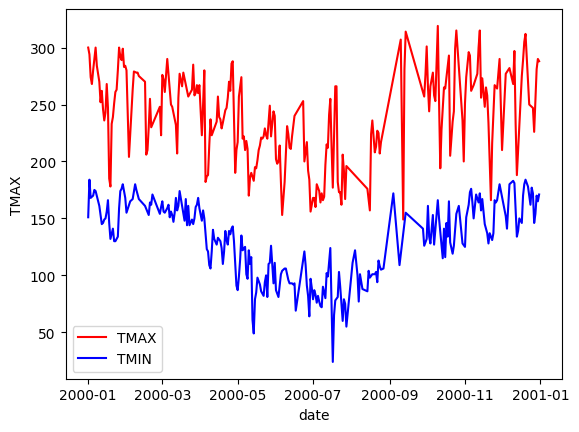

In [36]:
sns.lineplot(data=weather[weather.location=='ZI000067983'], x='date', y='TMAX', label='TMAX', color='red')
sns.lineplot(data=weather[weather.location=='ZI000067983'], x='date', y='TMIN', label='TMIN', color='blue')